In [203]:
import matplotlib.pyplot as plt
import numpy as np

from functools import partial

In [204]:
def triangle(x,x_center,width):
    res=0
    if(x<x_center):
        res= 1+(x-x_center)/(width/2)
    else:
        res= 1-(x-x_center)/(width/2)

    return np.clip(res,0,1)
    
   
vtriangle = np.vectorize(triangle)

In [205]:
LinguisticTerms = ["NL","N","Z","P","PL"]
amountOfTerms = len(LinguisticTerms)

# Create Membership Functions

In [206]:
range_phi=[-10,10]
distance_linguistic = (range_phi[1]-range_phi[0]) / (amountOfTerms-1)
spread_phi=distance_linguistic+2

PHI_Triangles=[]

for i in range(amountOfTerms):
    x_center = range_phi[0]+i*distance_linguistic
    term = LinguisticTerms[i]
    function_data={
        "term":term,
        "x_center":x_center,
        "spread_phi":spread_phi,
        "func":partial(lambda x_center,spread_phi,x:vtriangle(x,x_center,spread_phi),x_center,spread_phi)
    }
    PHI_Triangles.append(function_data)

In [207]:
range_phi_dot=[-40,40]
distance_linguistic = (range_phi_dot[1]-range_phi_dot[0]) / (amountOfTerms-1)
spread_phi_dot=distance_linguistic+8

PHI_DOT_Triangles=[]
for i in range(amountOfTerms):
    x_center = range_phi_dot[0]+i*distance_linguistic
    term = LinguisticTerms[i]
    function_data={
        "term":term,
        "x_center":x_center,
        "spread_phi_dot":spread_phi_dot,
        "func":partial(lambda x_center,spread_phi_dot,x:vtriangle(x,x_center,spread_phi_dot),x_center,spread_phi_dot)
    }
    PHI_DOT_Triangles.append(function_data)

In [208]:
range_force=[-15,15]
distance_linguistic = (range_force[1]-range_force[0]) / (amountOfTerms-1)
spread_force=12

FORCE_Triangles=[]
for i in range(amountOfTerms):
    x_center = range_force[0]+i*distance_linguistic
    term = LinguisticTerms[i]
    function_data={
        "term":term,
        "x_center":x_center,
        "spread_force":spread_phi_dot,
        "func":partial(lambda x_center,spread_force,x:vtriangle(x,x_center,spread_force),x_center,spread_force)
    }
    FORCE_Triangles.append(function_data)

# Plot

Text(0.5, 1.0, 'Linguistic terms for phi [°]')

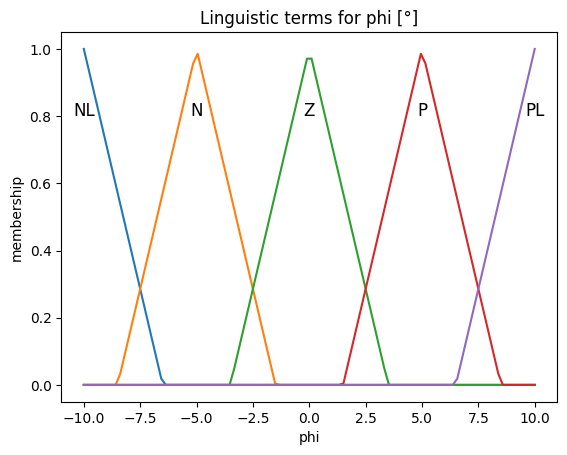

In [209]:
phi=np.linspace(range_phi[0],range_phi[1],100)

for membership_function in PHI_Triangles:
    x_center = membership_function["x_center"]
    func = membership_function["func"]
    term = membership_function["term"]

    y=func(phi)

    plt.plot(phi,y)
    plt.text(x_center,0.8,term,fontsize=12,horizontalalignment='center')

plt.xlabel("phi")
plt.ylabel("membership")
plt.title("Linguistic terms for phi [°]")


Text(0.5, 1.0, 'Linguistic terms for phi_dot [rad/s]')

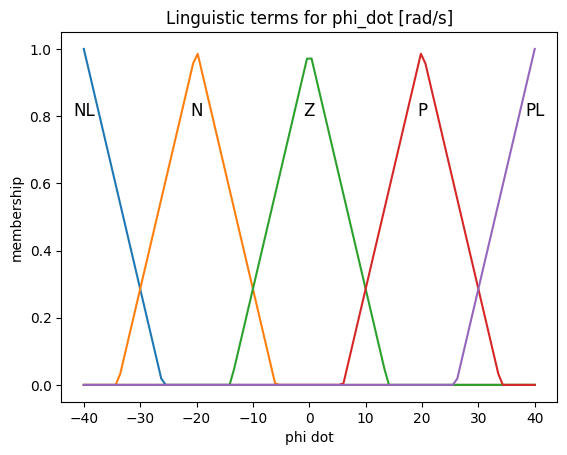

In [210]:
phi_dot=np.linspace(range_phi_dot[0],range_phi_dot[1],100)

for membership_function in PHI_DOT_Triangles:
    x_center = membership_function["x_center"]
    func = membership_function["func"]
    term = membership_function["term"]

    y = func(phi_dot)

    plt.plot(phi_dot,y)
    plt.text(x_center,0.8,term,fontsize=12,horizontalalignment='center')

plt.xlabel("phi dot")
plt.ylabel("membership")
plt.title("Linguistic terms for phi_dot [rad/s]")


Text(0.5, 1.0, 'Linguistic terms for force [N]')

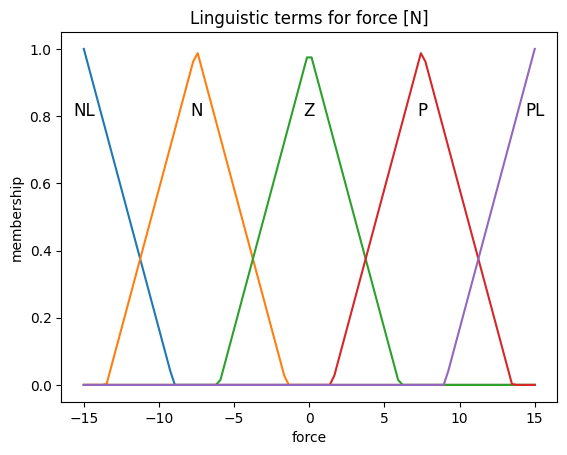

In [211]:
force=np.linspace(range_force[0],range_force[1],100)

for membership_function in FORCE_Triangles:
    x_center = membership_function["x_center"]
    func = membership_function["func"]
    term = membership_function["term"]

    y = func(force)

    plt.plot(force,y)
    plt.text(x_center,0.8,term,fontsize=12,horizontalalignment='center')

plt.xlabel("force")
plt.ylabel("membership")
plt.title("Linguistic terms for force [N]")

# Force Matrix
|phi_dot \phi | NL | N | Z | P | PL |
|----|----|---|---|---|----|
| NL | PL | PL | P | Z | Z |
| N | PL | P | P | Z | N |
| Z | P | P | Z | N | N |
| P | N | Z | N | N | NL |
| PL | Z | Z | N | NL | NL |


In [212]:
#phi, phi_dot matrix

phi_phi_dot_matrix = [
    ["PL","PL","P","Z","Z"],
    ["PL","P","P","Z","N"],
    ["P","P","Z","N","N"],
    ["N","Z","N","N","NL"],
    ["Z","Z","N","NL","NL"]
]


Text(0.5, 1.0, 'phi=N and phi_dot=P ==> force=Z')

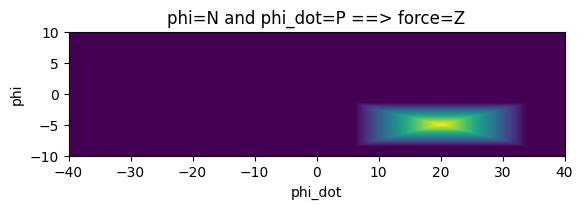

In [213]:
#calculate phi=N and phi_dot=P

phi_n = np.linspace(range_phi[0],range_phi[1],100)
phi_dot_p = np.linspace(range_phi_dot[0],range_phi_dot[1],100)

phi_NP = np.zeros((len(phi_n),len(phi_dot_p)))

for i in range(len(phi_n)):
    for j in range(len(phi_dot_p)):

        phi_index=1
        phi_dot_index=3

        phi_func=PHI_Triangles[phi_index]
        phi_dot_func=PHI_DOT_Triangles[phi_dot_index]

        phi_NP[i,j] = min(
            vtriangle(phi_n[i],phi_func["x_center"],phi_func["spread_phi"]),
            vtriangle(phi_dot_p[j],phi_dot_func["x_center"],phi_dot_func["spread_phi_dot"])
        )
      

plt.figure()
plt.imshow(phi_NP,extent=[range_phi_dot[0],range_phi_dot[1],range_phi[0],range_phi[1]],origin="lower")
plt.xlabel("phi_dot")
plt.ylabel("phi")
plt.title("phi=N and phi_dot=P ==> force=Z")


ZB: Phi=-4.5° , Phi_dot=28°/s

In [214]:
def calculate_force(phi,phi_dot,plot=True):
    memberships=[]

    for i in range(len(PHI_Triangles)):
        for j in range(len(PHI_DOT_Triangles)):
            phi_func=PHI_Triangles[i]
            phi_dot_func=PHI_DOT_Triangles[j]


            membership_value= min(
                        vtriangle(phi,phi_func["x_center"],phi_func["spread_phi"]),
                        vtriangle(phi_dot,phi_dot_func["x_center"],phi_dot_func["spread_phi_dot"])
                    )
            
            memberships.append((phi_func["term"],phi_dot_func["term"],phi_phi_dot_matrix[i][j],membership_value))

    if(plot):
        print("phi_dot\tphi\tforce\tmembership")
        for membership in memberships:
            print(membership[1],"\t",membership[0],"\t",membership[2],"\t",membership[3])


    sum_area = np.zeros(len(force))

    
    for (_,_,force_term,membership) in memberships:
        current_membership_function = list(filter(lambda x:x["term"]==force_term,FORCE_Triangles))[0]
        currfunc = current_membership_function["func"]

        y = currfunc(force)
        y = np.minimum(y,membership)

        sum_area = np.maximum(sum_area,y)
       
        if(plot):
            plt.plot(force,y,"--",label=force_term)
            plt.text(current_membership_function["x_center"],0.8,force_term,fontsize=12,horizontalalignment='center')


    if(plot):
        plt.plot(force,sum_area,label="sum")


    # calculate x coordinate of center of gravity
    center_of_gravity = np.sum(force*sum_area)/np.sum(sum_area)

    if(plot):
        plt.plot([center_of_gravity,center_of_gravity],[0,1],"--",label="center of gravity")
        plt.text(center_of_gravity,0.6,str(center_of_gravity),fontsize=12,horizontalalignment='center')

        print("Apply force=",center_of_gravity,"N")

    return center_of_gravity

phi=-4.5 phi_dot=28
phi_dot	phi	force	membership
NL 	 NL 	 PL 	 0.0
N 	 NL 	 PL 	 0.0
Z 	 NL 	 P 	 0.1428571428571429
P 	 NL 	 Z 	 0.1428571428571429
PL 	 NL 	 Z 	 0.0
NL 	 N 	 PL 	 0.0
N 	 N 	 P 	 0.0
Z 	 N 	 P 	 0.4285714285714286
P 	 N 	 Z 	 0.1428571428571429
PL 	 N 	 N 	 0.0
NL 	 Z 	 P 	 0.0
N 	 Z 	 P 	 0.0
Z 	 Z 	 Z 	 0.0
P 	 Z 	 N 	 0.0
PL 	 Z 	 N 	 0.0
NL 	 P 	 N 	 0.0
N 	 P 	 Z 	 0.0
Z 	 P 	 N 	 0.0
P 	 P 	 N 	 0.0
PL 	 P 	 NL 	 0.0
NL 	 PL 	 Z 	 0.0
N 	 PL 	 Z 	 0.0
Z 	 PL 	 N 	 0.0
P 	 PL 	 NL 	 0.0
PL 	 PL 	 NL 	 0.0
Apply force= 5.544544637961806 N


5.544544637961806

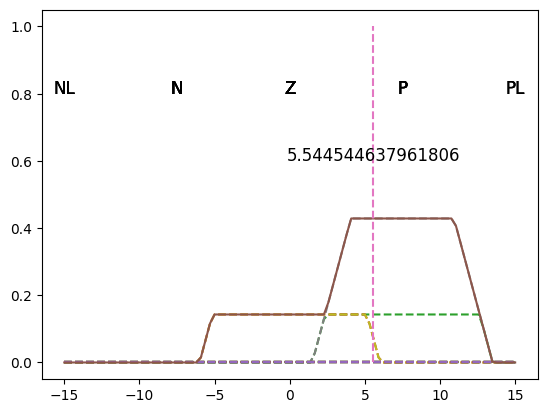

In [215]:
print("phi=-4.5 phi_dot=28")
calculate_force(-7,8)

Text(0.5, 1.0, 'force diagram')

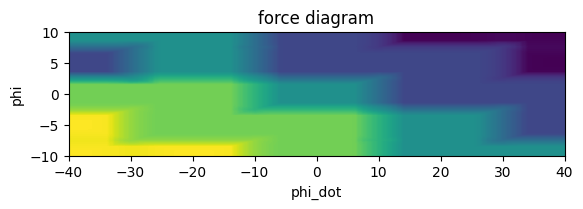

In [216]:
#calculate phi=N and phi_dot=P

phi_n = np.linspace(range_phi[0],range_phi[1],100)
phi_dot_p = np.linspace(range_phi_dot[0],range_phi_dot[1],100)

forcediagram = np.zeros((len(phi_n),len(phi_dot_p)))

for i in range(len(phi_n)):
    for j in range(len(phi_dot_p)):
        forcediagram[i][j] = calculate_force(phi_n[i],phi_dot_p[j],plot=False)
      

plt.figure()
plt.imshow(forcediagram,extent=[range_phi_dot[0],range_phi_dot[1],range_phi[0],range_phi[1]],origin="lower")
plt.xlabel("phi_dot")
plt.ylabel("phi")
plt.title("force diagram")
